In [1]:
import numpy as np 
from utils import *
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from principal_RBM_alpha import *
from principal_DBN_alpha import *
from principal_DNN_MNIST import *


# Etude préliminaire (Binary AlphaDigit)

## Charger la data

In [16]:
file_path = "data//binaryalphadigs.mat"  # Remplacez par le chemin complet de votre fichier
data = scipy.io.loadmat(file_path)
all_labels = [str(data['classlabels'].reshape(36,)[i][0]) for i in range(data['classlabels'].shape[1])]
all_labels_num = convert_labels_to_numeric(all_labels)
labels = ['A', 'B', 'C']
labels_num = convert_labels_to_numeric(labels)

In [4]:
print(all_labels)
print(convert_labels_to_numeric(all_labels))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


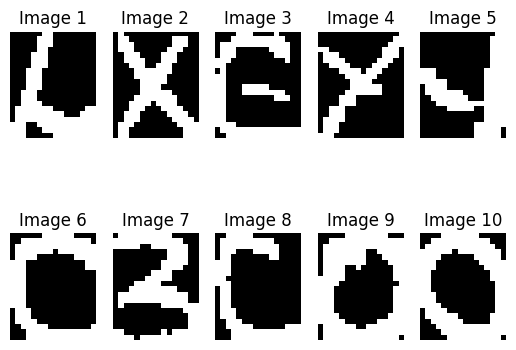

In [34]:
size_img = (20, 16)
X = lire_alpha_digit(data, all_labels_num)
indices  = np.random.choice(X.shape[0], size=10, replace=False)
display_images(X[indices], size_img)

## RBM sur Binary AlphaDigits 

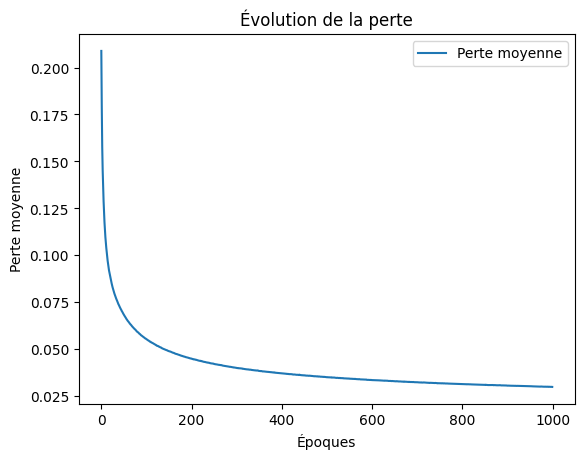

In [35]:
# Initialisation du RBM
rbm = RBM(n_visible=320, n_hidden=125)
# Entraînement du RBM
rbm.train(X, epochs=1000, batch_size=10, learning_rate=0.01)

Génération de caractères
15


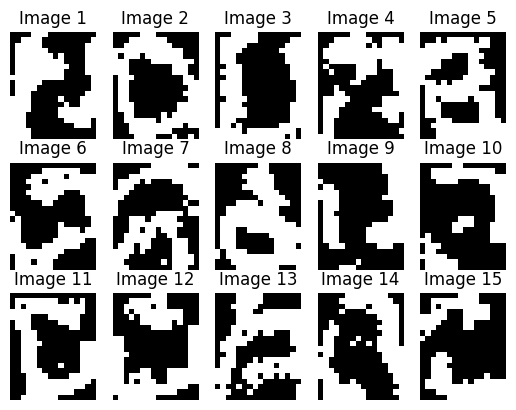

In [36]:
print("Génération de caractères")
n_images = 15
generated_images = rbm.generer_donnees(n_iter=5000, n_images=n_images)

# Afficher les images générées
display_images(generated_images, size_img)

print(len(generated_images))

## DBN sur Binary AlphaDigits 

Entraînement du DBN
Training RBM with 320 visible and 128 hidden units


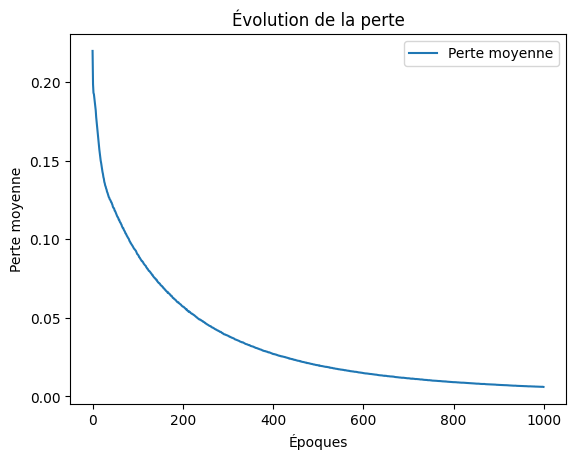

Training RBM with 128 visible and 64 hidden units


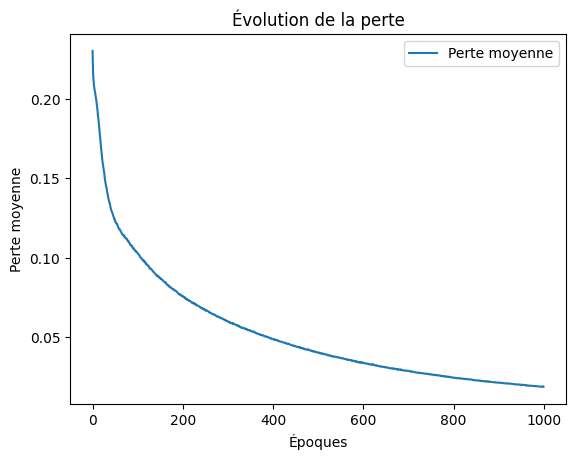

In [ ]:
# Initialiser la DBN
layer_sizes = [320, 128, 64, 32]  # 320 = 20*16 pixels d'entrée, couches cachées de 128 et 64
dbn = DBN_alpha(layer_sizes)

# Entraîner la DBN
print("Entraînement du DBN")
dbn.train_DBN(X, epochs=1000, batch_size=10, learning_rate=0.01)

Génération de caractères


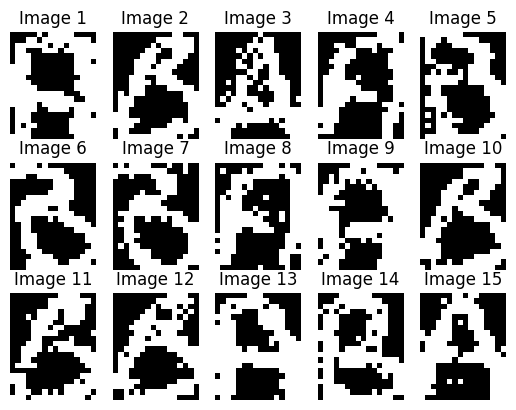

In [15]:
print("Génération de caractères")
n_images = 15
generated_images = dbn.generate_multiple_images(n_iter=500, n_images=n_images)

# Afficher les images générées
display_images(generated_images, size_img)

# DNN & Mnist

In [2]:
# Charger le dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Binarisation des images (0 ou 1)
x_train = (x_train > 127).astype(np.float32)
x_test = (x_test > 127).astype(np.float32)

# Reshaper les images en n_data, n_entree
n_entree = 28 * 28
x_train = x_train.reshape(x_train.shape[0], n_entree)
x_test = x_test.reshape(x_test.shape[0], n_entree)

# Afficher les dimensions des datasets
print("Dimensions des données :")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

# Afficher le type des x_train et x_test et y_train et y_test
print("Type des données :")
print(f"x_train: {type(x_train)}, y_train: {type(y_train)}")
print(f"x_test: {type(x_test)}, y_test: {type(y_test)}")

Dimensions des données :
x_train: (60000, 784), y_train: (60000,)
x_test: (10000, 784), y_test: (10000,)
Type des données :
x_train: <class 'numpy.ndarray'>, y_train: <class 'numpy.ndarray'>
x_test: <class 'numpy.ndarray'>, y_test: <class 'numpy.ndarray'>


In [3]:
# charger un dnn
layer_sizes = [784, 200, 128, 64, 10]
dnn = DNN(layer_sizes)

Training RBM with 784 visible and 200 hidden units
epoch 1/5 - Perte moyenne : 0.026486845932798535
epoch 2/5 - Perte moyenne : 0.017641515758976146
epoch 3/5 - Perte moyenne : 0.015482746413985024
epoch 4/5 - Perte moyenne : 0.014420952984105595
epoch 5/5 - Perte moyenne : 0.013748969922304614


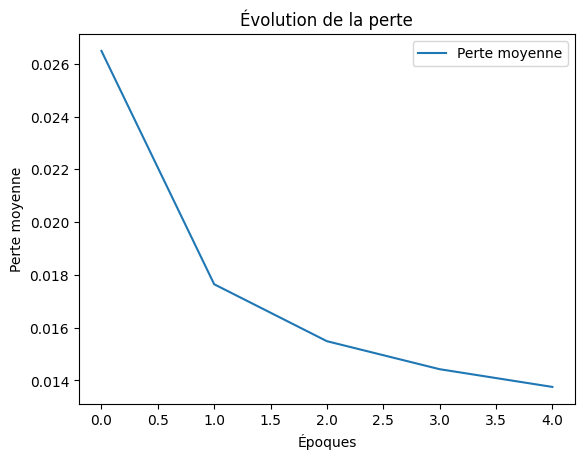

Training RBM with 200 visible and 128 hidden units
epoch 1/5 - Perte moyenne : 0.04897978283825784
epoch 2/5 - Perte moyenne : 0.030943668384208787
epoch 3/5 - Perte moyenne : 0.027276212564218076
epoch 4/5 - Perte moyenne : 0.02524422571589283
epoch 5/5 - Perte moyenne : 0.02391477741566304


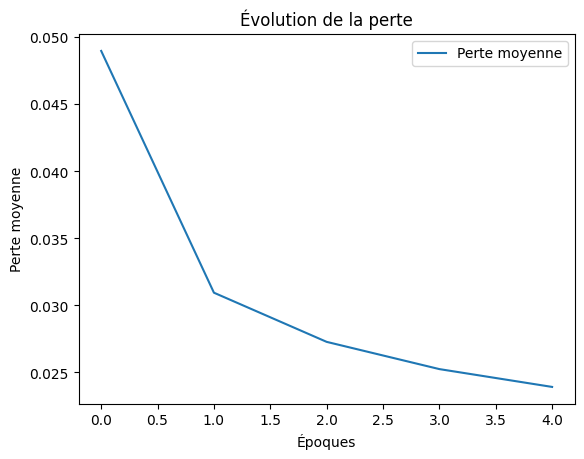

Training RBM with 128 visible and 64 hidden units
epoch 1/5 - Perte moyenne : 0.040933620737486506
epoch 2/5 - Perte moyenne : 0.025549105573714093
epoch 3/5 - Perte moyenne : 0.023014162947373497
epoch 4/5 - Perte moyenne : 0.02183661685741067
epoch 5/5 - Perte moyenne : 0.021112138856129416


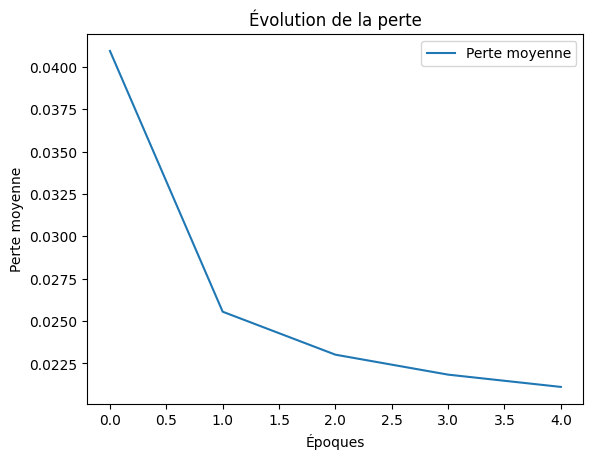

In [4]:
# pretrain 
dnn.pretrain_DNN(x_train, nb_iterations=5, batch_size=20, learning_rate=0.1, verbose=True)

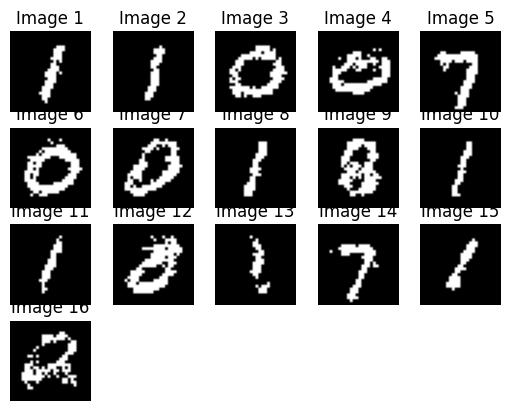

In [5]:
size_img = (28, 28)
generated_images = dnn.dbn.generate_multiple_images(n_iter=500, n_images=16)
display_images(generated_images, size_img)

Époque 1/30, Perte moyenne : 0.3446
Époque 2/30, Perte moyenne : 0.2082
Époque 3/30, Perte moyenne : 0.1707
Époque 4/30, Perte moyenne : 0.1468
Époque 5/30, Perte moyenne : 0.1292
Époque 6/30, Perte moyenne : 0.1156
Époque 7/30, Perte moyenne : 0.1044
Époque 8/30, Perte moyenne : 0.0951
Époque 9/30, Perte moyenne : 0.0867
Époque 10/30, Perte moyenne : 0.0798
Époque 11/30, Perte moyenne : 0.0736
Époque 12/30, Perte moyenne : 0.0682
Époque 13/30, Perte moyenne : 0.0634
Époque 14/30, Perte moyenne : 0.0590
Époque 15/30, Perte moyenne : 0.0551
Époque 16/30, Perte moyenne : 0.0515
Époque 17/30, Perte moyenne : 0.0482
Époque 18/30, Perte moyenne : 0.0452
Époque 19/30, Perte moyenne : 0.0424
Époque 20/30, Perte moyenne : 0.0398
Époque 21/30, Perte moyenne : 0.0374
Époque 22/30, Perte moyenne : 0.0351
Époque 23/30, Perte moyenne : 0.0329
Époque 24/30, Perte moyenne : 0.0310
Époque 25/30, Perte moyenne : 0.0293
Époque 26/30, Perte moyenne : 0.0277
Époque 27/30, Perte moyenne : 0.0260
Époque 28/

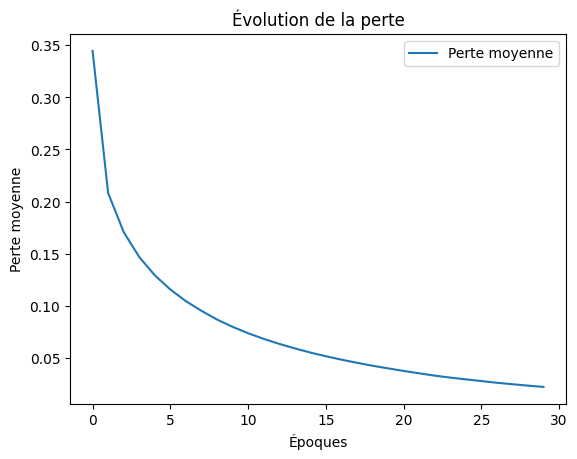

In [7]:
# fine tune du dnn
dnn.retropropagation(epochs= 30, learning_rate = 0.1, batch_size = 10, donnees_entree=x_train, labels=y_train, verbose=True)

In [8]:
# Evaluer le modèle
accuracy = dnn.test_DNN(x_test, y_test)
print(f"Précision du modèle: {accuracy}")

Accuracy: 96.73%
Précision du modèle: 0.9673
